# Make Long Single Tone Calibration WAV File
## By Terry Bondy, VA3TYB

In [1]:
printf(strftime ("Last updated: %A %e %B %Y %Z", localtime (time())))
%plot --format svg
# format long

Last updated: Saturday  4 January 2020 UTC

In [2]:
sampleRate = 16000;
numPeriods = 30; # in seconds
period = numPeriods;
Tshort = 0:1/sampleRate:1;
T = 0:1/sampleRate:period;

In [3]:
TestFreq = 721;
TestPhi = [ 0 ];
cosArg = 2*pi*TestFreq * Tshort + TestPhi;
Pilot = cos(cosArg);

In [4]:
Pilot = [(Pilot(1:end-1)' * ones(1, numPeriods))(:)', Pilot(1)];

In [5]:
introOutroPeriod = 5;

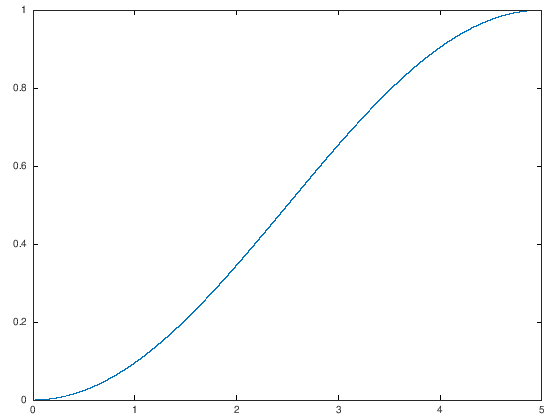

In [7]:
Tintro = 0:1/sampleRate:introOutroPeriod;
RCintro = (1 - cos(2*pi*Tintro/(introOutroPeriod*2)))/2;
plot(Tintro, RCintro)

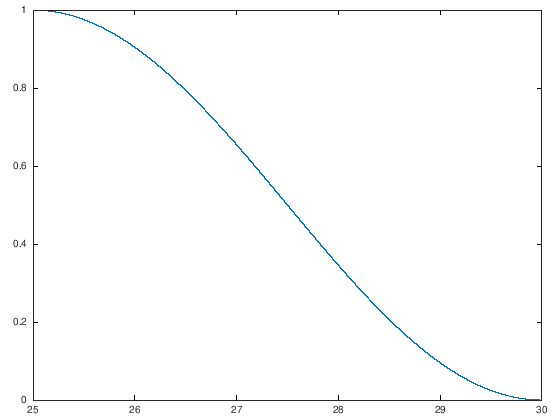

In [9]:
Toutro = (period-introOutroPeriod):1/sampleRate:period;
RCoutro = flip(RCintro);
plot(Toutro, RCoutro)

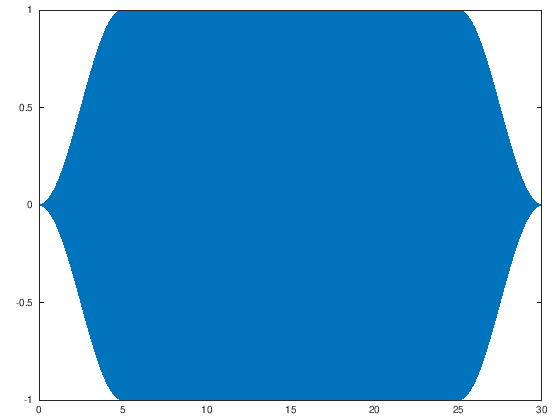

In [13]:
Envelope = [RCintro(1:end-1), ones(1, (period-2*introOutroPeriod)*sampleRate), RCoutro(1:end)];
Sig = Pilot .* Envelope;
plot(T, Sig)

In [14]:
calibrateFilename = "calibrateLongTone.wav"

calibrateFilename = calibrateLongTone.wav


In [15]:
calibrateFilename
audiowrite(calibrateFilename, Sig, sampleRate, 
"Title", "Long Tone Calibration file for Yaesu radioes.",
"Artist", "Terry Bondy, VA3TYB")

calibrateFilename = calibrateLongTone.wav


In [16]:
audioinfo(calibrateFilename)

ans =

  scalar structure containing the fields:

    Filename = calibrateLongTone.wav
    CompressionMethod = 
    NumChannels =  1
    SampleRate =  16000
    TotalSamples =  480001
    Duration =  30.000
    BitsPerSample =  16
    BitRate = -1
    Title = Long Tone Calibration file for Yaesu radioes.
    Artist = Terry Bondy, VA3TYB
    Comment = 



In [18]:
[y, fs] = audioread(calibrateFilename);
size(y)
fs

ans =

   480001        1

fs =  16000


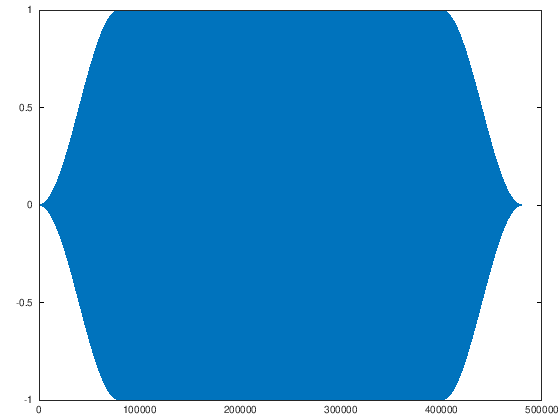

In [19]:
plot(y)